In [1]:
#Model Selection Cross Validation Score
# how to get the best resultS
#Partitioning v/s CV
import pandas as pd 
import numpy as np 
import os

In [3]:
os.chdir('C:\\Users\\toshi\\Downloads\\01_DataScience\\AI\\Datasets')

In [6]:
df=pd.read_csv("diabetes2.csv")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
array=df.values
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [10]:
X=array[:,0:8]
y=array[:,8]

In [1]:
seed=7

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [17]:
from sklearn.model_selection import KFold

In [19]:
from sklearn.model_selection import cross_val_score

In [21]:
kfold=KFold(n_splits=10,random_state=7)

In [23]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [24]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
result =model.score(X_test,y_test)

In [26]:
result

0.7755905511811023

In [27]:
print ("Accuracy with partitioning :{}".format(result))

Accuracy with partitioning :0.7755905511811023


In [28]:
model2=LogisticRegression()

In [29]:
results=cross_val_score(model2,X,y,cv=kfold)

In [30]:
print("Accuracy with CV:{}".format(results.mean()))

Accuracy with CV:0.7695146958304853


# GridSearch

In [31]:
##Model par tunning/Hyper par optimization
# create best model with  best pars
# GridSearchCv RandomSearchCv

In [32]:
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [33]:
dataset=datasets.load_diabetes()

In [38]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [39]:
alphas=np.array([1,0.1,0.01,0.001,0.0001,0])

In [41]:
model=Ridge()

In [44]:
grid=GridSearchCV(estimator=model,param_grid=dict(alpha=alphas))

In [45]:
grid

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
grid.fit(dataset.data,dataset.target)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
print(grid.best_score_)

0.48879020446060156


In [49]:
print(grid.best_estimator_.alpha)

0.001


# RANDOM SEARCH

In [51]:
##random search is a seacond meathod to tune the algo 
from scipy.stats import uniform  as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [52]:
dataset=datasets.load_diabetes()

In [53]:
param_grid={'alpha':sp_rand()}

In [54]:
model=Ridge()

In [57]:
rsearch = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=100)

In [58]:
rsearch.fit(dataset.data,dataset.target)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E87F4C3E80>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [59]:
print(rsearch.best_score_)

0.48913431435667437


In [61]:
print(rsearch.best_estimator_.alpha)

0.04850430666112515


In [62]:
###AUTOMATE ML USING PIPLINE#####

In [63]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
from sklearn.pipeline import Pipeline

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [68]:
from sklearn.preprocessing import StandardScaler

In [74]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [75]:
estimators=[]

In [77]:
estimators.append(('Standardize',StandardScaler()))

In [78]:
estimators.append(('lda',LinearDiscriminantAnalysis()))

In [80]:
models =Pipeline(estimators)

In [81]:
models

Pipeline(memory=None,
     steps=[('Standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lda', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))])

In [82]:
seed=7

In [83]:
kfold=KFold(n_splits=10,random_state=seed)

In [84]:
result=cross_val_score(model,X,y,cv=kfold)

In [85]:
result

array([ 0.15845742,  0.32097473,  0.2762203 ,  0.24375619,  0.25055438,
        0.32513792, -0.02598225,  0.45257042,  0.27578302,  0.30321331])

In [86]:
print(result.mean())

0.25806854548831526


In [88]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [89]:
features=[]

In [90]:
features.append(('pca',PCA(n_components=3)))

In [91]:
features.append(('select_kbest',SelectKBest(k=6)))
                

In [92]:
feature_union=FeatureUnion(features)

In [93]:
feature_union######......

FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('select_kbest', SelectKBest(k=6, score_func=<function f_classif at 0x000001E87EFD5C80>))],
       transformer_weights=None)

In [94]:
estimators=[]

In [96]:
estimators.append(('feature_union',feature_union))

In [97]:
estimators.append(('logistic',LogisticRegression()))

In [99]:
model = Pipeline(estimators)

In [100]:
seed=7

In [101]:
kfold=KFold(n_splits=10,random_state=seed)

In [102]:
result=cross_val_score(model,X,y,cv=kfold)

In [103]:
result

array([0.68831169, 0.81818182, 0.76623377, 0.68831169, 0.77922078,
       0.79220779, 0.84415584, 0.83116883, 0.75      , 0.80263158])

In [104]:
print(result.mean())

0.7760423786739576


In [105]:
#####HOW TO COMPARE THE ML ALGOS####

In [108]:
import  matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [112]:
model=[]

In [114]:
model.append(('log Reg',LogisticRegression()))

In [115]:
model.append(('LDA',LinearDiscriminantAnalysis()))

In [116]:
model.append(('KNN',KNeighborsClassifier()))

In [118]:
model.append(('NB',GaussianNB()))

In [128]:
from sklearn.svm import SVC
model.append(('SVM',SVC))

In [129]:
result=[]
names=[]
scoring='accuracy'


In [130]:
for name,model in models:
    kfold=model_selection.KFOld(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring=scoring)
    result=append(cv_results)
    names.append(name)
    mgs="%s:%f(%f)"%(name,cv_result.mean(),cv_result,std())
    print(mgs)

TypeError: 'Pipeline' object is not iterable

AttributeError: 'AxesSubplot' object has no attribute 'set_xtickslabels'

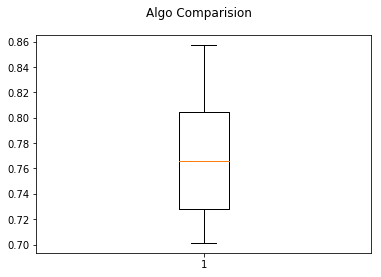

In [124]:
fig=plt.figure()
fig.suptitle('Algo Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xtickslabels(names)
plt.show()